In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [2]:
import neptune.new as neptune

run = neptune.init(
    name="HW-DNN",
    project="sormazabal/HW1",
    api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiI2MmYwNjgxZi1iYWI1LTQ4OTItODhiMS02YjJmZTg4MzRhN2QifQ==",
)  

https://app.neptune.ai/sormazabal/HW1/e/HW-6
Remember to stop your run once you’ve finished logging your metadata (https://docs.neptune.ai/api-reference/run#.stop). It will be stopped automatically only when the notebook kernel/interactive console is terminated.


In [3]:
#Load data
df=pd.read_csv("creditcard_sample.csv")

In [5]:
pd.set_option("display.max_columns", 100)
print("df.shape", df.shape) #31 features, 28 without class
df.head()

df.shape (99999, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


I: You need to split the data into training (80%) and test (20%) data.

In [8]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [283]:
#divide the data into test and train
#Class is the target I want to predict
Y = df['Class'] 
X = df.drop('Class', axis=1)
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=0)


In [10]:
logisticRegression = LogisticRegression()

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
#fix scaling error with SS and pipeline
pipelineLR = make_pipeline(StandardScaler(), LogisticRegression())
pipelineLR.fit(x_train, y_train)




Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [12]:
predictionsLR = pipelineLR.predict(x_test)
pipelineLR.score(x_test, y_test)


0.99895

In [43]:
#Confusion matrix
from sklearn import metrics
confusion_matrixLR = metrics.confusion_matrix(y_test, predictionsLR)
print(confusion_matrixLR)

[[19949     6]
 [   15    30]]


Text(0.5, 1.0, 'Confusion matrix for Logistic Regression')

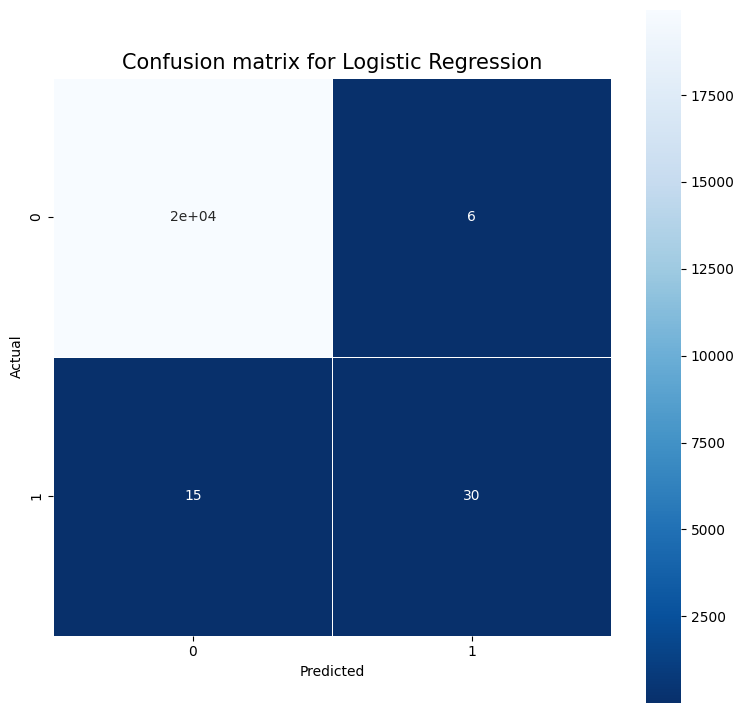

In [44]:
#Plot CM in a prettier plot
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrixLR, annot=True,  linewidths=.5, square = True, cmap = 'Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix for Logistic Regression', size = 15)

For each class, please calculate the corresponding Accuracy, Precision, Recall,
and F1-Score on the test set in your report.

In [45]:
from sklearn.metrics import classification_report
class_report_LR =  classification_report(y_test, predictionsLR)
print(class_report_LR)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19955
           1       0.83      0.67      0.74        45

    accuracy                           1.00     20000
   macro avg       0.92      0.83      0.87     20000
weighted avg       1.00      1.00      1.00     20000



AUROC and AUPRC

you have to plot the receiver operating characteristic curve (ROC, as
shown in Figure 3) and precision-recall curve (PRC, as shown in Figure 3)
with their area-under-curve (AUROC and AUPRC) for DNN, LR, SVM, and
random forest on the test set

[]

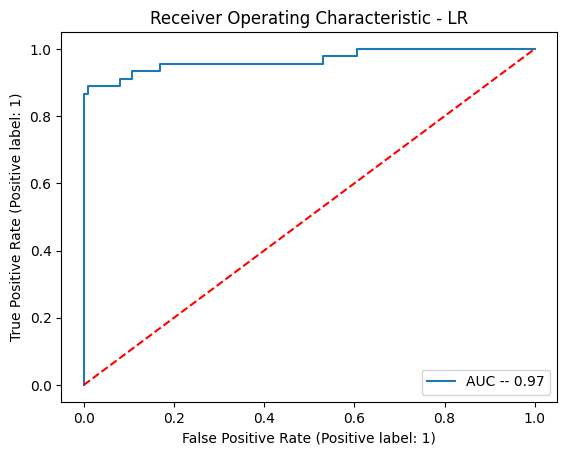

In [48]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay
roc_auc = roc_auc_score(y_test, pipelineLR.decision_function(x_test))

RocCurveDisplay.from_estimator( pipelineLR, x_test, y_test, label="AUC -- %0.2f" % roc_auc)
plt.title("Receiver Operating Characteristic - LR")
plt.plot([0, 1], [0, 1], color="red",  linestyle="--")

plt.plot()

[]

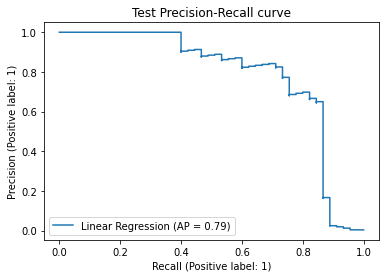

In [86]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

base = np.array([0, 1, 2, 3])
prc = PrecisionRecallDisplay.from_estimator( pipelineLR, x_test, y_test, name= 'Linear Regression')
plt.title("Test Precision-Recall curve - LR")
#plt.fill(0,prc)
plt.plot()



**SVMs**

In [88]:
from sklearn.svm import SVC

pipelineSVM = make_pipeline(StandardScaler(), SVC(kernel = 'rbf'))
pipelineSVM.fit(x_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [89]:
predictions_svm = pipelineSVM.predict(x_test)

In [90]:
#Confusion matrix

confusion_matrixSVM = metrics.confusion_matrix(y_test, predictions_svm)
print(confusion_matrixSVM)

[[19954     1]
 [   11    34]]


Text(0.5, 1.0, 'Confusion matrix for SVM Classifier')

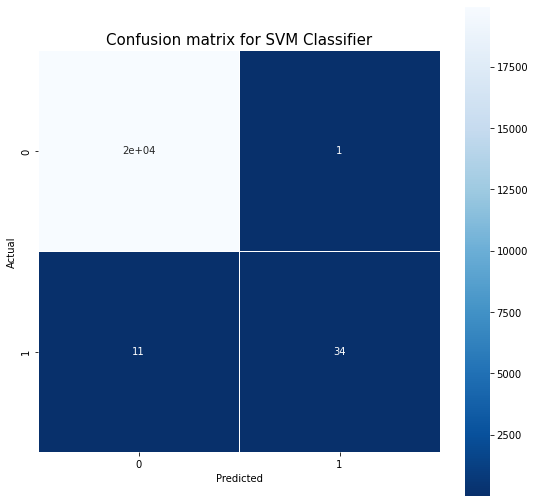

In [91]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrixSVM, annot=True,  linewidths=.5, square = True, cmap = 'Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix for SVM Classifier', size = 15)

In [92]:
class_report_SVM =  classification_report(y_test, predictions_svm)
print(class_report_SVM)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19955
           1       0.97      0.76      0.85        45

    accuracy                           1.00     20000
   macro avg       0.99      0.88      0.92     20000
weighted avg       1.00      1.00      1.00     20000



[]

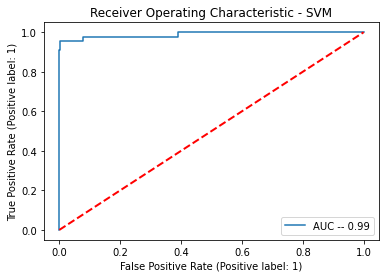

In [104]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay
roc_auc = roc_auc_score(y_test, pipelineSVM.decision_function(x_test))

RocCurveDisplay.from_estimator( pipelineSVM, x_test, y_test, label="AUC -- %0.2f" % roc_auc)
plt.title("Receiver Operating Characteristic - SVM")
plt.plot([0, 1], [0, 1], color="red", linestyle="--")

plt.plot()

[]

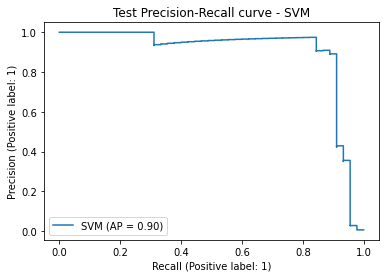

In [95]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

base = np.array([0, 1, 2, 3])
prc = PrecisionRecallDisplay.from_estimator( pipelineSVM, x_test, y_test, name= 'SVM')
plt.title("Test Precision-Recall curve - SVM")
#plt.fill(0,prc)
plt.plot()

Random Forest Classifier

In [96]:
from sklearn.ensemble import RandomForestClassifier

pipelineRF = make_pipeline(StandardScaler(), RandomForestClassifier(max_depth=2))
pipelineRF.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=2))])

In [97]:
predictions_RF = pipelineRF.predict(x_test)

In [98]:
#Confusion matrix

confusion_matrixRF = metrics.confusion_matrix(y_test, predictions_RF)
print(confusion_matrixRF)

[[19947     8]
 [   13    32]]


Text(0.5, 1.0, 'Confusion matrix for RF Classifier')

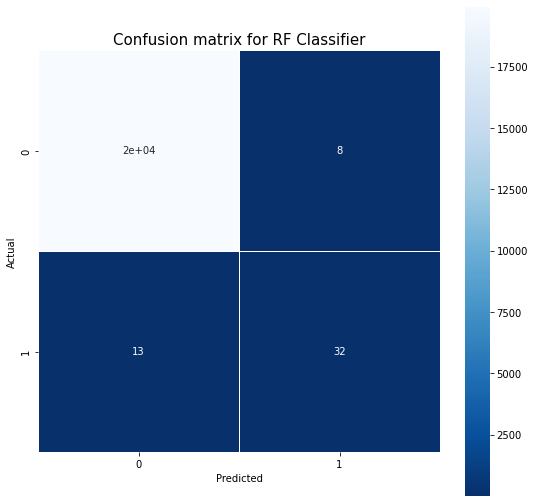

In [99]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrixRF, annot=True,  linewidths=.5, square = True, cmap = 'Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix for RF Classifier', size = 15)


In [100]:
class_report_RF=  classification_report(y_test, predictions_RF)
print(class_report_RF)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19955
           1       0.80      0.71      0.75        45

    accuracy                           1.00     20000
   macro avg       0.90      0.86      0.88     20000
weighted avg       1.00      1.00      1.00     20000



[]

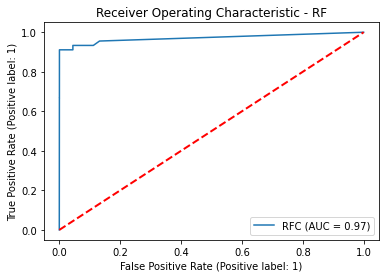

In [108]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay


RocCurveDisplay.from_estimator( pipelineRF, x_test, y_test, name= "RFC") 
plt.title("Receiver Operating Characteristic - RF")
plt.plot([0, 1], [0, 1], color="red", linestyle="--")

plt.plot()

[]

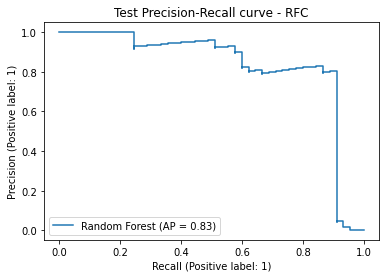

In [102]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

base = np.array([0, 1, 2, 3])
prc = PrecisionRecallDisplay.from_estimator( pipelineRF, x_test, y_test, name= 'Random Forest')
plt.title("Test Precision-Recall curve - RFC")
#plt.fill(0,prc)
plt.plot()

**DNN**
(40%) Please construct a DNN model with Pytorch for binary classification
according to the cross-entropy error function.

In [6]:
import torch
from torch import nn
from torch.nn import functional as F

In [7]:
def accuracy_f(y_pred, target):
    #acc = (y_true == target).sum().item()
    acc = (torch.eq(target, y_pred).sum().item())* 100/ (len(target)) 
    return acc

In [8]:
from sklearn.preprocessing import StandardScaler
torch.cuda.is_available()
device = "cuda" if torch.cuda.is_available() else "cpu"
df=pd.read_csv("creditcard_sample.csv")
Y = df['Class'] 
X = df.drop('Class', axis=1)

x_train, x_test, y_train, y_test = train_test_split(X, 
                                                    Y, 
                                                    test_size=0.2, # 20% test, 80% train
                                                    random_state=0) # make the random split reproducible

#scale
std_scaler = StandardScaler()
x_train = std_scaler.fit_transform(x_train.values)
x_test =  std_scaler.fit_transform(x_test.values)

In [9]:
#transform to tensor
x_train =  torch.from_numpy(x_train).float().to(device)
y_train =  torch.from_numpy(y_train.values.ravel()).float().to(device)
x_test =  torch.from_numpy(x_test).float().to(device)
y_test =  torch.from_numpy(y_test.values.ravel()).float().to(device)

In [10]:
#Hyperparameters

n_hidden_units = 60
learning_rate = 0.01
mini_batch_size = 64
epochs = 50
n_features = x_train.shape[1]



In [11]:
params = {"n_hidden_units": n_hidden_units, "learning_rate": learning_rate, "mini_batch_size": mini_batch_size, "epochs": epochs, "optimizer": "Adam"}
run["parameters"] = params


In [12]:
class DNNBC(nn.Module):
  def __init__(self,n_features = n_features):
    super(DNNBC,self).__init__()
    #input shape = 30
    self.n_hidden_units = n_hidden_units
    self.l1 = nn.Linear(n_features,self.n_hidden_units) 
    self.l2 = nn.Linear(self.n_hidden_units,self.n_hidden_units)
    self.l3 = nn.Linear(self.n_hidden_units,1)
    
      
  def forward(self,x):
    batch_norm = nn.BatchNorm1d(n_hidden_units).to(device)
    x = nn.functional.relu(self.l1(x))
    x = batch_norm(x)
    x = nn.functional.relu(self.l2(x))
    x = batch_norm(x)
    x = torch.sigmoid(self.l3(x)) #nn.functional.softmax
    return x



In [15]:
y_loss = {}  
y_loss['train'] = []
y_loss['test'] = []

y_accuracy = {}
y_accuracy['train'] = []
y_accuracy['test'] = []


In [13]:
model = DNNBC(n_features =n_features).to(device)
torch.manual_seed(0)

optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)
loss_f = nn.BCELoss()


In [14]:
from torch.utils.data import DataLoader, TensorDataset
from torch.utils.data.dataloader import default_collate

#Training
y_train = y_train.unsqueeze(1)
train_ds = TensorDataset(x_train, y_train)
train_dl = DataLoader(train_ds, batch_size=mini_batch_size, collate_fn=lambda x: tuple(x_.to(device) for x_ in default_collate(x)))


#Testing
y_test = y_test.unsqueeze(1)
test_ds = TensorDataset(x_test, y_test)
test_loader = DataLoader(test_ds, batch_size=int(mini_batch_size/2), collate_fn=lambda x: tuple(x_.to(device) for x_ in default_collate(x)))



In [16]:
#torch.multiprocessing.set_start_method('spawn')
import itertools
model.train()
y_pred_list = []


for epoch in range(epochs):
    
    for xb, yb in train_dl:
        y_pred = model(xb)            
        loss = loss_f(y_pred, yb) 
        acc = accuracy_f(y_pred=y_pred.to(torch.uint8), target = yb.to(torch.uint8))        

        optimizer.zero_grad()        
        loss.backward()               
        optimizer.step()              
    
    y_loss['train'].append(loss.item())
    y_accuracy['train'].append(acc)
    
    run["train/loss"].log(y_loss)
    run["train/accuracy"].log(acc)
      


    model.eval()
    with torch.inference_mode():
        for xb_test,yb_test  in test_loader:
            y_test_pred = model(xb_test)
            y_pred_class = torch.round(y_test_pred)

            loss_test = loss_f(y_test_pred, yb_test) 
            acc_test = accuracy_f(y_pred=y_test_pred.to(torch.uint8), target = yb_test.to(torch.uint8))

            run["test/loss"].log(loss_test)
            run["test/accuracy"].log(acc_test)

            if epoch == epochs-1:
                y_pred_list.append(y_pred_class.cpu().detach().numpy())


        y_loss['test'].append(loss_test.item())
        y_accuracy['test'].append(acc_test)

    if epoch % 20 == 0:
        print(f"Epoch: {epoch} | Training Accuracy: {acc:.2f}% | Training Loss: {loss:.5f} || Test Accuracy: {acc_test:.2f}% | Test Loss: {loss_test:.5f}")

    


Epoch: 0 | Training Accuracy: 100.00% | Training Loss: 0.01596 || Test Accuracy: 100.00% | Test Loss: 0.01623
Epoch: 20 | Training Accuracy: 100.00% | Training Loss: 0.00001 || Test Accuracy: 100.00% | Test Loss: 0.00002
Epoch: 40 | Training Accuracy: 100.00% | Training Loss: 0.00000 || Test Accuracy: 100.00% | Test Loss: 0.00000


In [21]:
           
y_pred_list = [a for a in y_pred_list]
ytest_pred = list(itertools.chain.from_iterable(y_pred_list))


a) training accuracy, (b) test accuracy, (c) training
loss, (d) test loss (Figure 2 is an example.), (e) confusion matrices, and (f) Accuracy,
Precision, Recall, and F1-Score in the report.
Grid search over parameters

In [22]:
from sklearn import metrics
from torchmetrics import ConfusionMatrix, Precision, Recall
from torchmetrics.functional import f1_score
from torchmetrics import PrecisionRecallCurve
from sklearn.metrics import classification_report
from torchmetrics import ROC
target = y_test.cpu().detach().numpy()
preds = ytest_pred


In [36]:
import seaborn as sns

def show_conf_matrix(target, preds, run=None):
    confmat_DNN = metrics.confusion_matrix(target, preds)
    print("Confusion Matrix of the Test Set")
    print("-----------")
    print(confmat_DNN)
    plt.figure(figsize=(9,9))
    fig = sns.heatmap(confmat_DNN, annot=True,  linewidths=.5, square = True, cmap = 'Blues')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion matrix for DNN', size = 15)

    if run:
        run["confusion-matrix"] = fig



In [35]:
def get_classification_report(target, preds, run = None):
    class_report_DNN =  classification_report(target, preds)
    if run:
        run["classification_report"] = classification_report
    print(class_report_DNN)

In [25]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay
from torchmetrics import AUROC

def plot_AUROC(target, preds,run = None):
    roc_auc_s =roc_auc_score(target, preds)
    print(roc_auc_s)
    rocauc_plot = RocCurveDisplay.from_predictions(target, preds, name= "DNN")
    plt.title("Receiver Operating Characteristic - DNN")
    plt.plot([0, 1], [0, 1], color="red", linestyle="--")
    plt.plot()

    if run:
        run["roc_auc"] = roc_auc_s
        run["auroc_plot"] = rocauc_plot




In [26]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

def plot_AUPRC(target, preds,run = None):
    precision, recall, thresholds = precision_recall_curve(target, preds)
    print(precision, recall, thresholds)

    prc = PrecisionRecallDisplay.from_predictions( target, preds, name= 'DNN')

    plt.title("Test Precision-Recall curve - DNN")
    #plt.fill(0,prc)

    if run:
        run["auprc_plot"] = prc
    plt.show()



In [37]:
def plot_loss(y_loss, run=None):
    fig = plt.figure(figsize=(10,5))
    plt.title("Training and Validation Loss")
    plt.plot(y_loss['train'],label="Training")
    plt.plot(y_loss['test'],label="Test")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

    if run:
        run["loss_plot"] = fig
   

SyntaxError: invalid syntax (2286808537.py, line 11)

In [28]:
def plot_accuracy(y_accuracy):
    plt.figure(figsize=(10,5))
    plt.title("Training and Validation Accuracy")
    plt.plot(y_accuracy['train'],label="Training")
    plt.plot(y_accuracy['test'],label="Test")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

Confusion Matrix of the Test Set
-----------
[[19952     3]
 [    6    39]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     19955
         1.0       0.93      0.87      0.90        45

    accuracy                           1.00     20000
   macro avg       0.96      0.93      0.95     20000
weighted avg       1.00      1.00      1.00     20000

0.9332581642027896
[0.00225    0.92857143 1.        ] [1.         0.86666667 0.        ] [0. 1.]


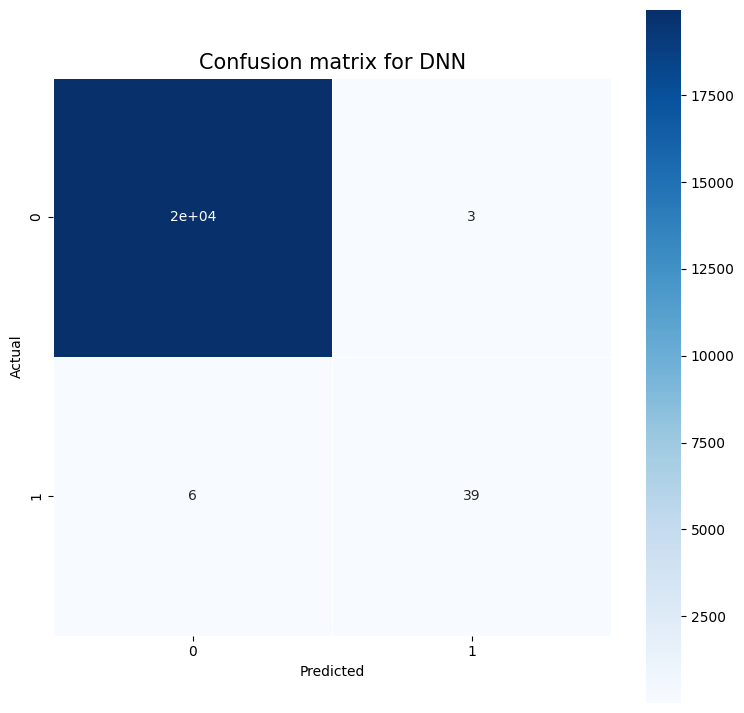

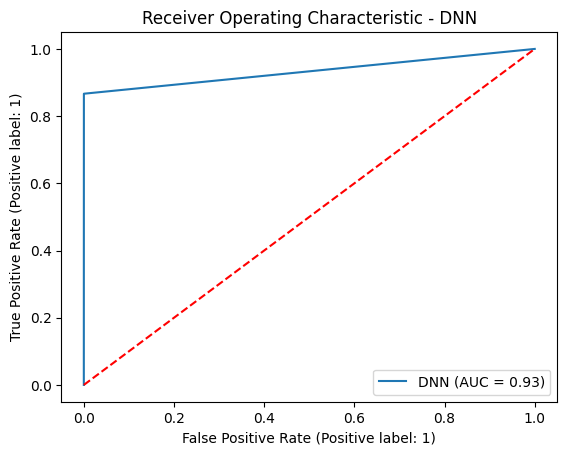

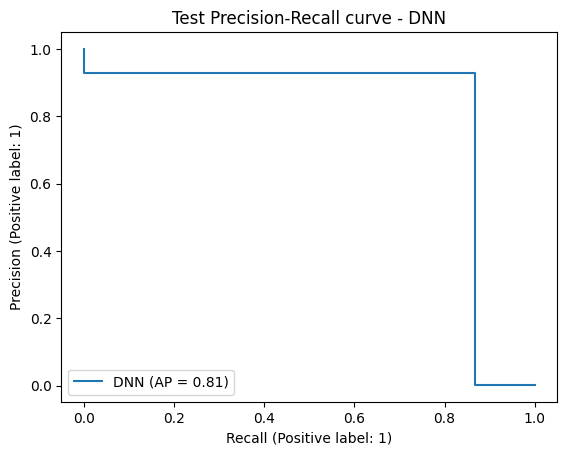

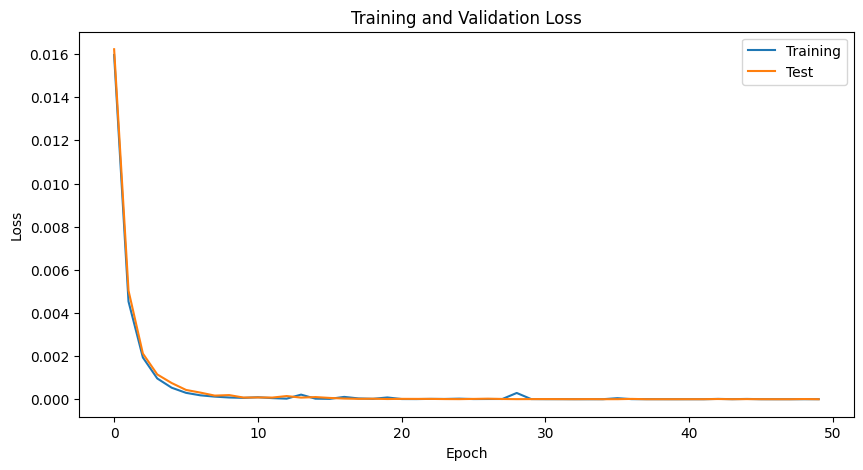

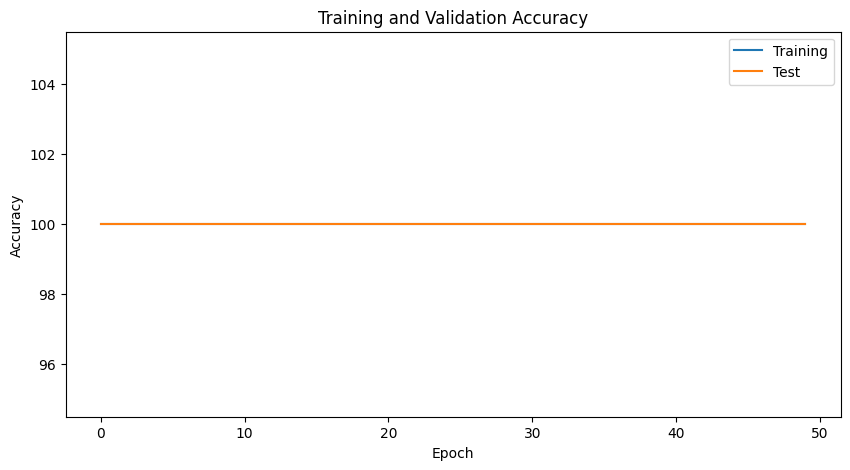

In [29]:
show_conf_matrix(target, preds)
get_classification_report(target, preds)
plot_AUROC(target, preds)
plot_AUPRC(target, preds)
plot_loss(y_loss)
plot_accuracy(y_accuracy)


In [30]:
run.stop()

Shutting down background jobs, please wait a moment...
Done!
Waiting for the remaining 1 operations to synchronize with Neptune. Do not kill this process.
All 1 operations synced, thanks for waiting!
Explore the metadata in the Neptune app:
https://app.neptune.ai/sormazabal/HW1/e/HW-6


10%) You have to plot the receiver operating characteristic curve (ROC, as
shown in Figure 3) and precision-recall curve (PRC, as shown in Figure 3)
with their area-under-curve (AUROC and AUPRC) for DNN, LR, SVM, and
random forest on the test set.

vii) Undersampling
1)random undersampling method to deal
with your training dataset and bring the non-fraud transactions to the same
amount as fraud transactions (we want a 50/50 ratio).

In [14]:
#go back to Pandas df
from collections import Counter
Y = df['Class'] 
X = df.drop('Class', axis=1)
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=0)
print(Counter(y_train))

Counter({0: 79821, 1: 178})


In [16]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler
undersampler = RandomUnderSampler(sampling_strategy=1)
unders_x, unders_y = undersampler.fit_resample(x_train, y_train) #ask about test data too


In [35]:

print(Counter(unders_y))

Counter({0: 178, 1: 178})


**Performance after undersampling**
Second, use this training dataset to train the LR, RF, SVM, and DNN again. Whether the performance
improves after resampling in your case?

In [50]:
#LR
x_train = unders_x
y_train = unders_y
pipelineLR = make_pipeline(StandardScaler(), LogisticRegression())
pipelineLR.fit(x_train, y_train)
predictionsLR = pipelineLR.predict(x_test)
pipelineLR.score(x_test, y_test)

0.98045

[[19566   389]
 [    2    43]]


Text(0.5, 1.0, 'Confusion matrix for Logistic Regression')

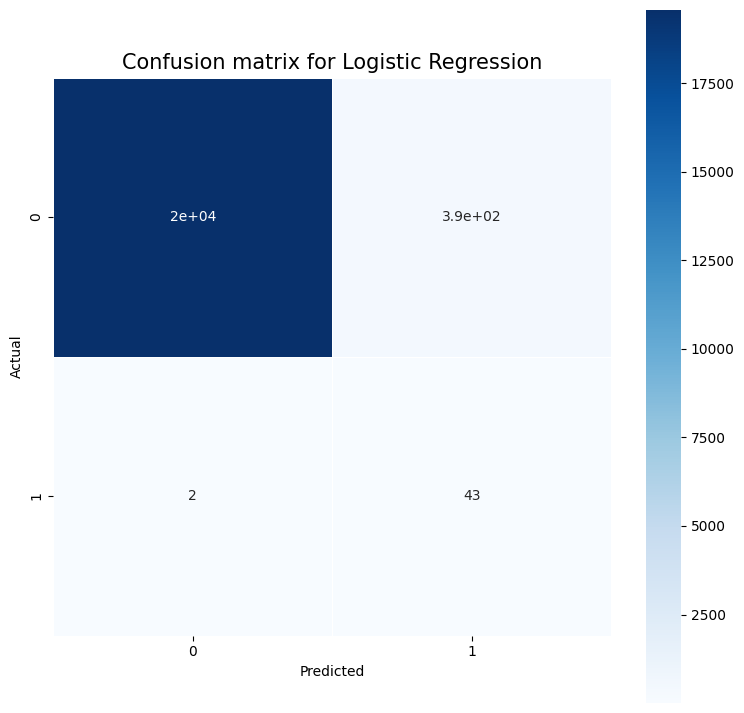

In [53]:
#Confusion matrix
from sklearn import metrics
confusion_matrixLR = metrics.confusion_matrix(y_test, predictionsLR)
print(confusion_matrixLR)
#Plot CM in a prettier plot
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrixLR, annot=True,  linewidths=.5, square = True, cmap = 'Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix for Logistic Regression', size = 15)

In [54]:
from sklearn.metrics import classification_report
class_report_LR =  classification_report(y_test, predictionsLR)
print(class_report_LR)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     19955
           1       0.10      0.96      0.18        45

    accuracy                           0.98     20000
   macro avg       0.55      0.97      0.59     20000
weighted avg       1.00      0.98      0.99     20000



[]

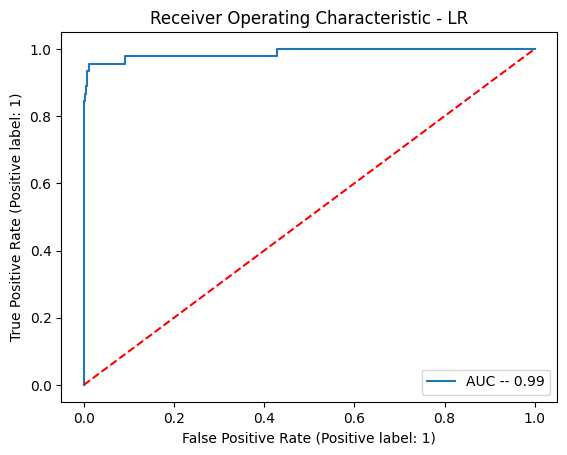

In [55]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay
roc_auc = roc_auc_score(y_test, pipelineLR.decision_function(x_test))

RocCurveDisplay.from_estimator( pipelineLR, x_test, y_test, label="AUC -- %0.2f" % roc_auc)
plt.title("Receiver Operating Characteristic - LR")
plt.plot([0, 1], [0, 1], color="red",  linestyle="--")

plt.plot()

#gets definitely better

[]

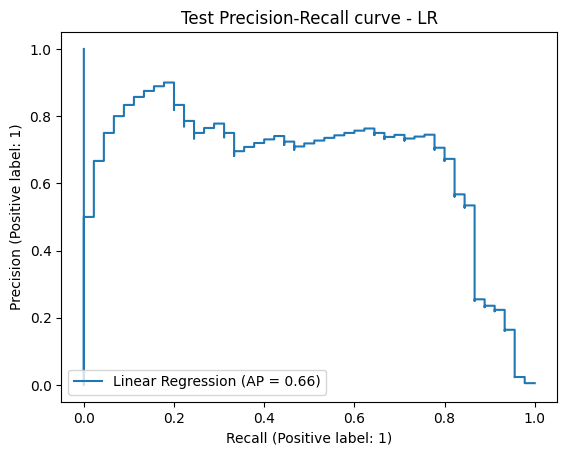

In [57]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

base = np.array([0, 1, 2, 3])
prc = PrecisionRecallDisplay.from_estimator( pipelineLR, x_test, y_test, name= 'Linear Regression')
plt.title("Test Precision-Recall curve - LR")
#plt.fill(0,prc)
plt.plot()

#gets worse 

SVM Undersampled

In [59]:
from sklearn.svm import SVC

pipelineSVM = make_pipeline(StandardScaler(), SVC(kernel = 'rbf'))
pipelineSVM.fit(x_train, y_train)
predictions_svm = pipelineSVM.predict(x_test)

[[19504   451]
 [    3    42]]


Text(0.5, 1.0, 'Confusion matrix for SVM Classifier')

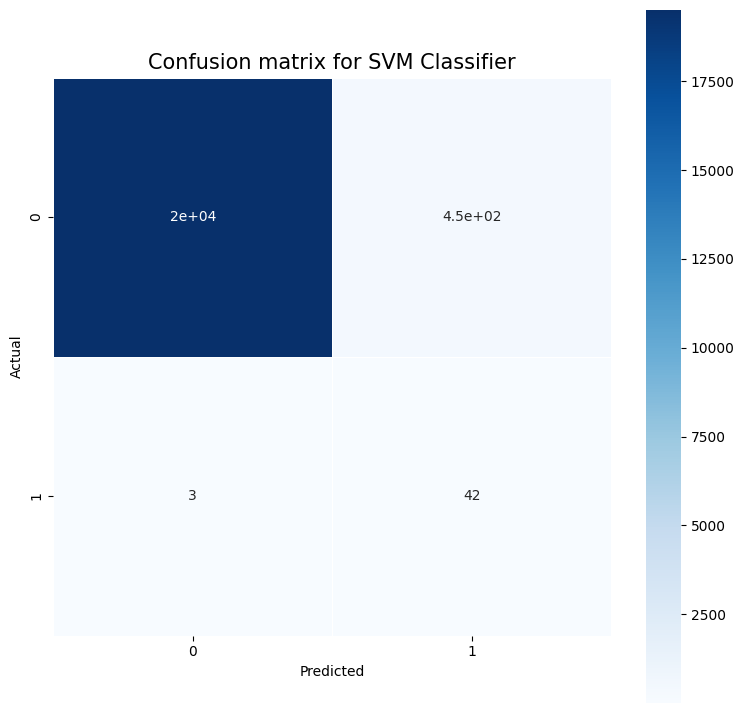

In [61]:
#Confusion matrix

confusion_matrixSVM = metrics.confusion_matrix(y_test, predictions_svm)
print(confusion_matrixSVM)
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrixSVM, annot=True,  linewidths=.5, square = True, cmap = 'Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix for SVM Classifier', size = 15)

In [62]:
class_report_SVM =  classification_report(y_test, predictions_svm)
print(class_report_SVM)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     19955
           1       0.09      0.93      0.16        45

    accuracy                           0.98     20000
   macro avg       0.54      0.96      0.57     20000
weighted avg       1.00      0.98      0.99     20000



[]

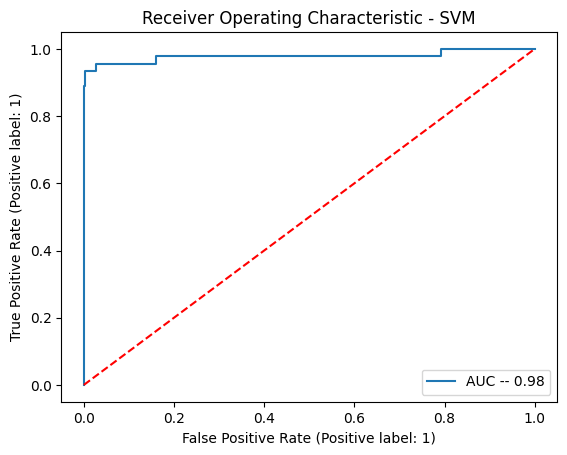

In [64]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay
roc_auc = roc_auc_score(y_test, pipelineSVM.decision_function(x_test))

RocCurveDisplay.from_estimator( pipelineSVM, x_test, y_test, label="AUC -- %0.2f" % roc_auc)
plt.title("Receiver Operating Characteristic - SVM")
plt.plot([0, 1], [0, 1], color="red", linestyle="--")

plt.plot()

#worse 0.99 to 0.98

[]

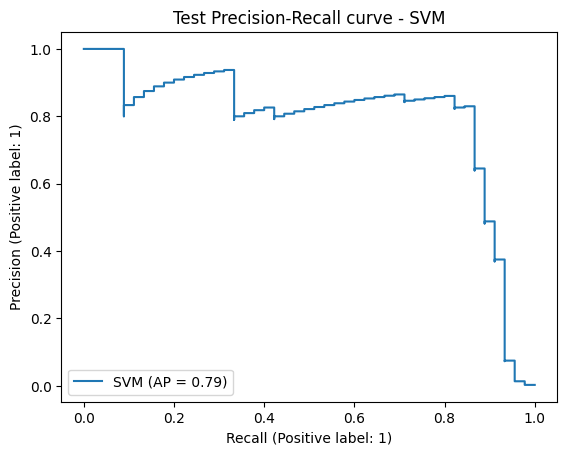

In [65]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

base = np.array([0, 1, 2, 3])
prc = PrecisionRecallDisplay.from_estimator( pipelineSVM, x_test, y_test, name= 'SVM')
plt.title("Test Precision-Recall curve - SVM")
#plt.fill(0,prc)
plt.plot()

#got worse: 0.9 => 0.79

Random Forest Classifier Undersampled


In [66]:
from sklearn.ensemble import RandomForestClassifier

pipelineRF = make_pipeline(StandardScaler(), RandomForestClassifier(max_depth=2))
pipelineRF.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=2))])

[[19742   213]
 [    4    41]]


Text(0.5, 1.0, 'Confusion matrix for RF Classifier')

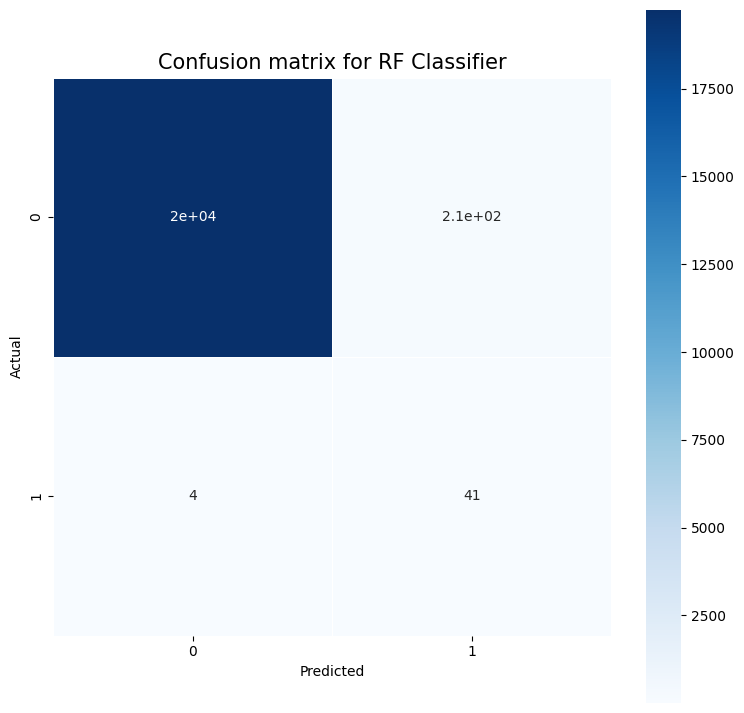

In [69]:
predictions_RF = pipelineRF.predict(x_test)
#Confusion matrix

confusion_matrixRF = metrics.confusion_matrix(y_test, predictions_RF)
print(confusion_matrixRF)
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrixRF, annot=True,  linewidths=.5, square = True, cmap = 'Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix for RF Classifier', size = 15)


In [70]:
class_report_RF=  classification_report(y_test, predictions_RF)
print(class_report_RF)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     19955
           1       0.16      0.91      0.27        45

    accuracy                           0.99     20000
   macro avg       0.58      0.95      0.63     20000
weighted avg       1.00      0.99      0.99     20000



[]

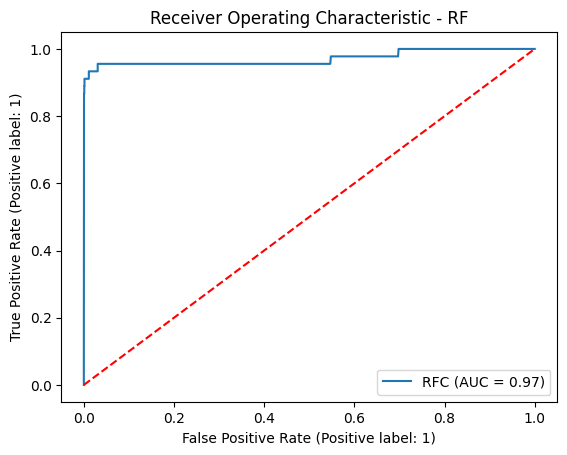

In [72]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay


RocCurveDisplay.from_estimator( pipelineRF, x_test, y_test, name= "RFC") 
plt.title("Receiver Operating Characteristic - RF")
plt.plot([0, 1], [0, 1], color="red",  linestyle="--")

plt.plot()

#Equal

[]

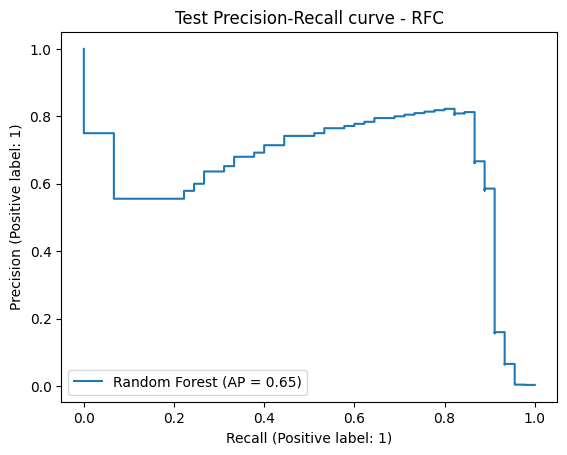

In [73]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

base = np.array([0, 1, 2, 3])
prc = PrecisionRecallDisplay.from_estimator( pipelineRF, x_test, y_test, name= 'Random Forest')
plt.title("Test Precision-Recall curve - RFC")
#plt.fill(0,prc)
plt.plot()

#worse => 0.83 to 0.65

DNN undersampled



In [26]:
import torch
from torch import nn
from torch.nn import functional as F
from sklearn.preprocessing import StandardScaler
import imblearn
from imblearn.under_sampling import RandomUnderSampler
torch.cuda.is_available()
device = "cuda" if torch.cuda.is_available() else "cpu"
df=pd.read_csv("creditcard_sample.csv")
Y = df['Class'] 
X = df.drop('Class', axis=1)

x_train, x_test, y_train, y_test = train_test_split(X, 
                                                    Y, 
                                                    test_size=0.2, # 20% test, 80% train
                                                    random_state=0) # make the random split reproducible


undersampler = RandomUnderSampler(sampling_strategy=1)
unders_x, unders_y = undersampler.fit_resample(x_train, y_train) 

x_train = unders_x
y_train = unders_y

#scale
std_scaler = StandardScaler()
x_train = std_scaler.fit_transform(x_train.values)
x_test =  std_scaler.fit_transform(x_test.values)

In [27]:
#transform to tensor
x_train =  torch.from_numpy(x_train).float().to(device)
y_train =  torch.from_numpy(y_train.values.ravel()).float().to(device)
x_test =  torch.from_numpy(x_test).float().to(device)
y_test =  torch.from_numpy(y_test.values.ravel()).float().to(device)

In [28]:
#Hyperparameters
n_hidden_layers = 1
n_hidden_units = 60
learning_rate = 0.01
mini_batch_size = 64
n_features = x_train.shape[1]

In [29]:
model = DNNBC(n_features =n_features).to(device)
print(model)

DNNBC(
  (l1): Linear(in_features=30, out_features=60, bias=True)
  (l2): Linear(in_features=60, out_features=60, bias=True)
  (l3): Linear(in_features=60, out_features=1, bias=True)
)


In [30]:
torch.manual_seed(0)
epochs = 50
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)
loss_f = nn.BCELoss()

In [31]:
from torch.utils.data import DataLoader, TensorDataset
from torch.utils.data.dataloader import default_collate

#Training
y_train = y_train.unsqueeze(1)
train_ds = TensorDataset(x_train, y_train)
train_dl = DataLoader(train_ds, batch_size=mini_batch_size, collate_fn=lambda x: tuple(x_.to(device) for x_ in default_collate(x)))


#Testing
y_test = y_test.unsqueeze(1)
test_ds = TensorDataset(x_test, y_test)
test_loader = DataLoader(test_ds, batch_size=int(mini_batch_size/2), collate_fn=lambda x: tuple(x_.to(device) for x_ in default_collate(x)))



In [32]:
y_loss = {}  
y_loss['train'] = []
y_loss['test'] = []

y_accuracy = {}
y_accuracy['train'] = []
y_accuracy['test'] = []

In [33]:
#torch.multiprocessing.set_start_method('spawn')
import itertools
model.train()
y_pred_list = []


for epoch in range(epochs):
    
    for xb, yb in train_dl:
        y_pred = model(xb)            
        loss = loss_f(y_pred, yb) 
        acc = accuracy_f(y_pred=y_pred.to(torch.uint8), target = yb.to(torch.uint8))        

        optimizer.zero_grad()        
        loss.backward()               
        optimizer.step()              
    
    y_loss['train'].append(loss.item())
    y_accuracy['train'].append(acc)


    model.eval()
    with torch.inference_mode():
        for xb_test,yb_test  in test_loader:
            y_test_pred = model(xb_test)
            y_pred_tag = torch.round(y_test_pred)

            #Calculate Loss and Acc
            loss_test = loss_f(y_test_pred, yb_test) 
            acc_test = accuracy_f(y_pred=y_test_pred.to(torch.uint8), target = yb_test.to(torch.uint8))

            if epoch == epochs-1:
                y_pred_list.append(y_pred_tag.cpu().detach().numpy())

        #Collect values for Loss and Acc plots
        y_loss['test'].append(loss_test.item())
        y_accuracy['test'].append(acc_test)

    if epoch % 20 == 0:
        print(f"Epoch: {epoch} | Training Accuracy: {acc:.2f}% | Training Loss: {loss:.5f} || Test Accuracy: {acc_test:.2f}% | Test Loss: {loss_test:.5f}")

    


Epoch: 0 | Training Accuracy: 0.00% | Training Loss: 0.74328 || Test Accuracy: 100.00% | Test Loss: 0.70977
Epoch: 20 | Training Accuracy: 0.00% | Training Loss: 0.66046 || Test Accuracy: 100.00% | Test Loss: 0.86149
Epoch: 40 | Training Accuracy: 0.00% | Training Loss: 0.60260 || Test Accuracy: 100.00% | Test Loss: 0.89617


In [34]:
           
y_pred_list = [a.squeeze().tolist() for a in y_pred_list]
ytest_pred = list(itertools.chain.from_iterable(y_pred_list))

Metrics for undersampled DNN

In [35]:
from sklearn import metrics
from torchmetrics import ConfusionMatrix, Precision, Recall
from torchmetrics.functional import f1_score
from torchmetrics import PrecisionRecallCurve
from sklearn.metrics import classification_report
from torchmetrics import ROC
target = y_test.cpu().detach().numpy()
preds = ytest_pred


In [36]:
confmat_DNN = metrics.confusion_matrix(target, preds)
print("Confusion Matrix of the Test Set")
print("-----------")
print(confmat_DNN)


Confusion Matrix of the Test Set
-----------
[[ 8513 11442]
 [    2    43]]


Text(0.5, 1.0, 'Confusion matrix for DNN')

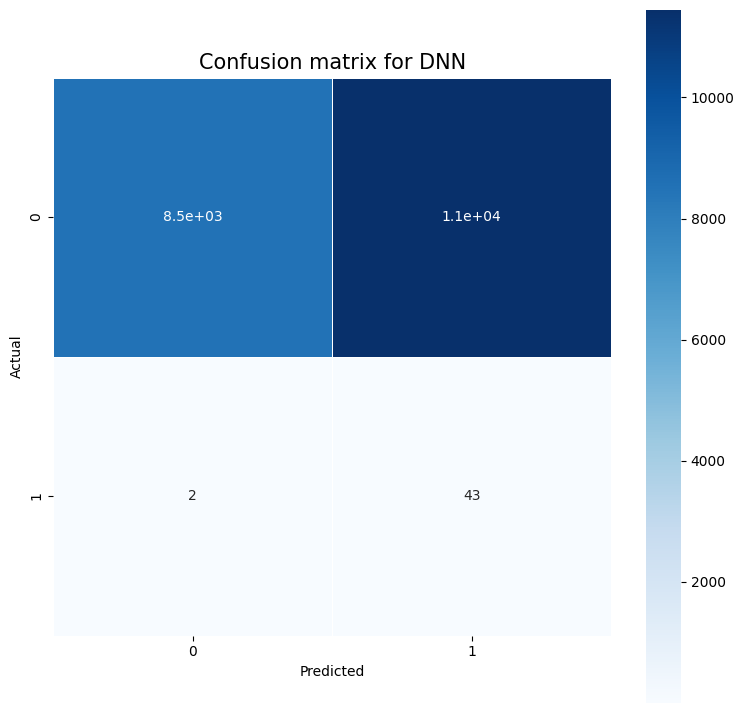

In [37]:
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(confmat_DNN, annot=True,  linewidths=.5, square = True, cmap = 'Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix for DNN', size = 15)

In [38]:
class_report_DNN =  classification_report(target, preds)
print(class_report_DNN)

              precision    recall  f1-score   support

         0.0       1.00      0.43      0.60     19955
         1.0       0.00      0.96      0.01        45

    accuracy                           0.43     20000
   macro avg       0.50      0.69      0.30     20000
weighted avg       1.00      0.43      0.60     20000



AUROC and AUPRC - DNN undersampled

0.6910827138840168


[]

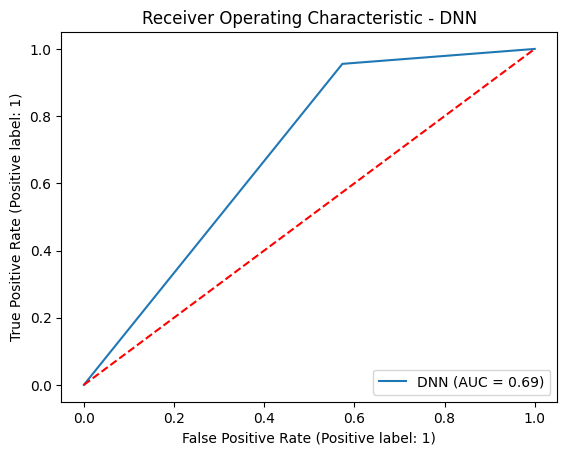

In [39]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay
from torchmetrics import AUROC

print(roc_auc_score(target, preds))


RocCurveDisplay.from_predictions(target, preds, name= "DNN")
plt.title("Receiver Operating Characteristic - DNN")
plt.plot([0, 1], [0, 1], color="red", linestyle="--")

plt.plot()

[0.00225    0.00374401 1.        ] [1.         0.95555556 0.        ] [0. 1.]


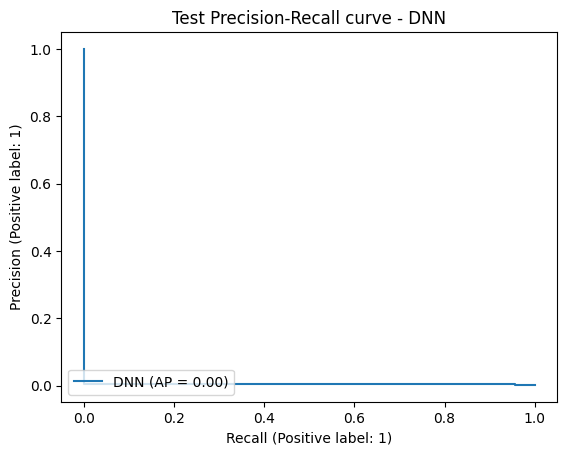

In [60]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

precision, recall, thresholds = precision_recall_curve(target, preds)
print(precision, recall, thresholds)

prc = PrecisionRecallDisplay.from_predictions( target, preds, name= 'DNN')
#prc = PrecisionRecallDisplay( precision, recall, estimator_name= 'DNN')

plt.title("Test Precision-Recall curve - DNN")

plt.show()

Loss and Accuracy plots

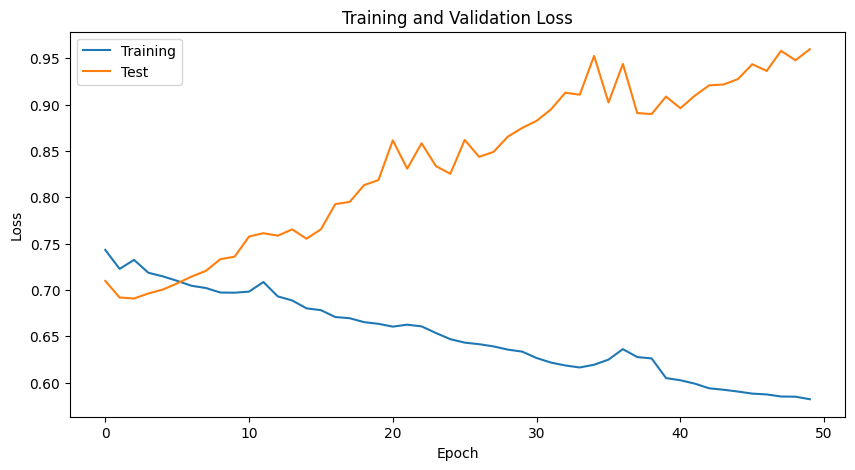

In [51]:
plt.figure(figsize=(10,5))
plt.title("Training and Validation Loss")
plt.plot(y_loss['train'],label="Training")
plt.plot(y_loss['test'],label="Test")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

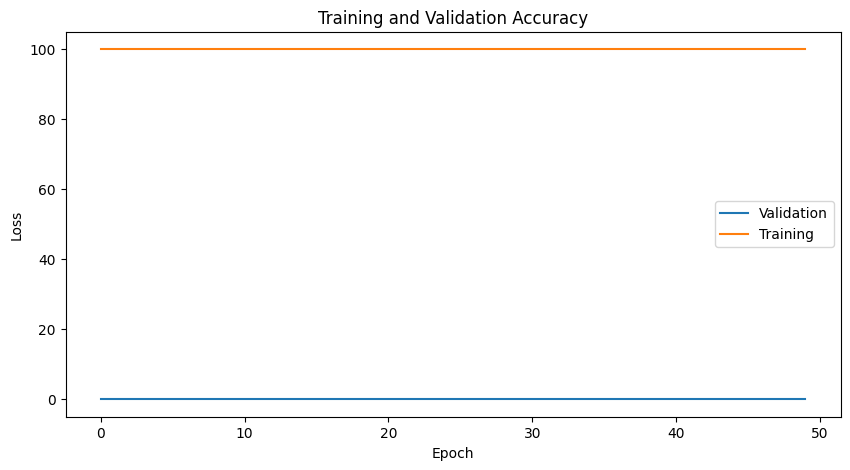

In [50]:
plt.figure(figsize=(10,5))
plt.title("Training and Validation Accuracy")
plt.plot(y_accuracy['train'],label="Validation")
plt.plot(y_accuracy['test'],label="Training")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

viii) (Bonus 10%) Follow (vii). Do you know other methods to deal with
imbalanced data? (you can explain your ideas or directly implement them, the
latter gets more points

Synthetic minority oversampling

Grid Search

In [31]:

n_hidden_units_arr = [30, 60, 90]
learning_rate_arr = [0.001, 0.01, 0.1]
mini_batch_size_arr = [32, 64, 128]
epochs_arr = [30, 50, 80]

https://app.neptune.ai/sormazabal/HW1/e/HW-7
Remember to stop your run once you’ve finished logging your metadata (https://docs.neptune.ai/api-reference/run#.stop). It will be stopped automatically only when the notebook kernel/interactive console is terminated.
Epoch: 0 | Training Accuracy: 100.00% | Training Loss: 0.12553 || Test Accuracy: 100.00% | Test Loss: 0.12587
Epoch: 20 | Training Accuracy: 100.00% | Training Loss: 0.00032 || Test Accuracy: 100.00% | Test Loss: 0.00012
Confusion Matrix of the Test Set
-----------
[[19951     4]
 [    6    39]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     19955
         1.0       0.91      0.87      0.89        45

    accuracy                           1.00     20000
   macro avg       0.95      0.93      0.94     20000
weighted avg       1.00      1.00      1.00     20000

0.9332331078259417
[0.00225    0.90697674 1.        ] [1.         0.86666667 0.        ] [0. 1.]


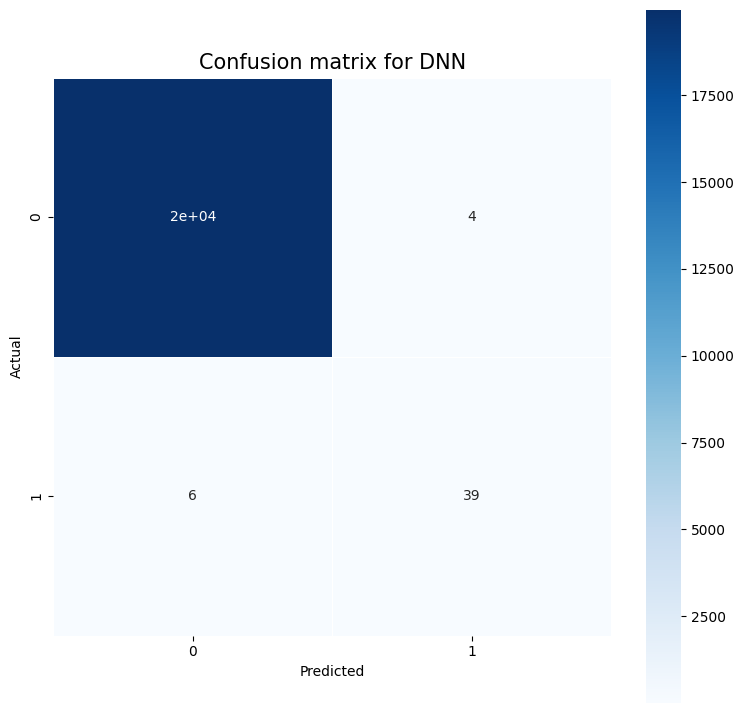

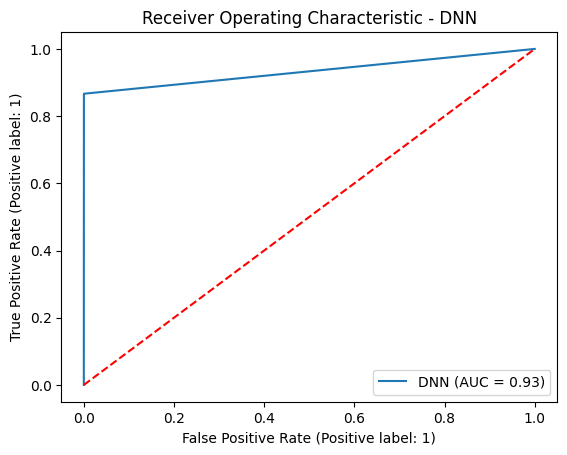

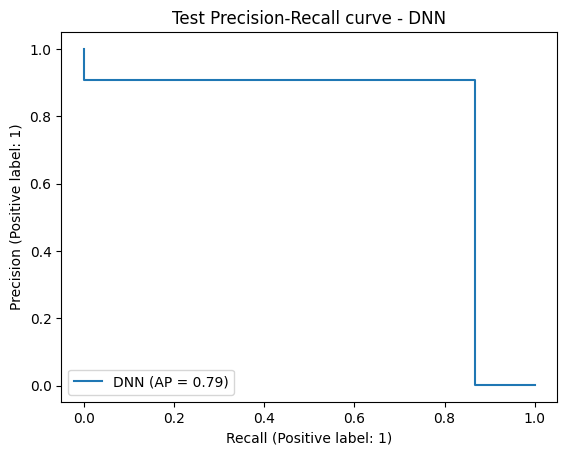

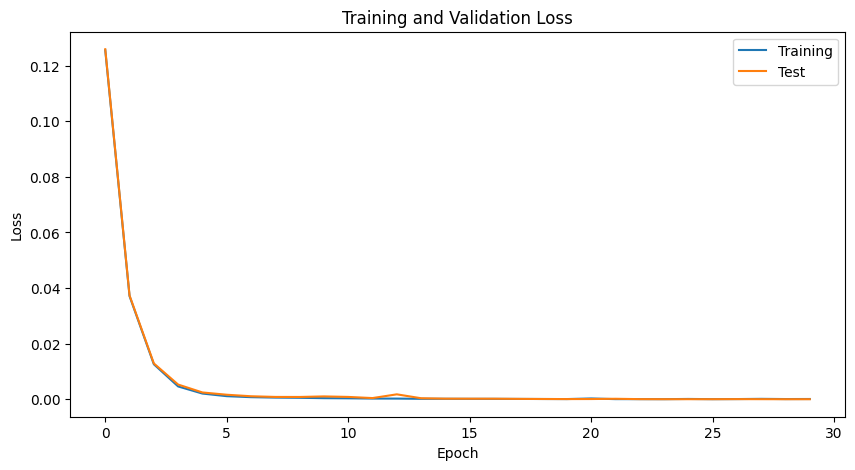

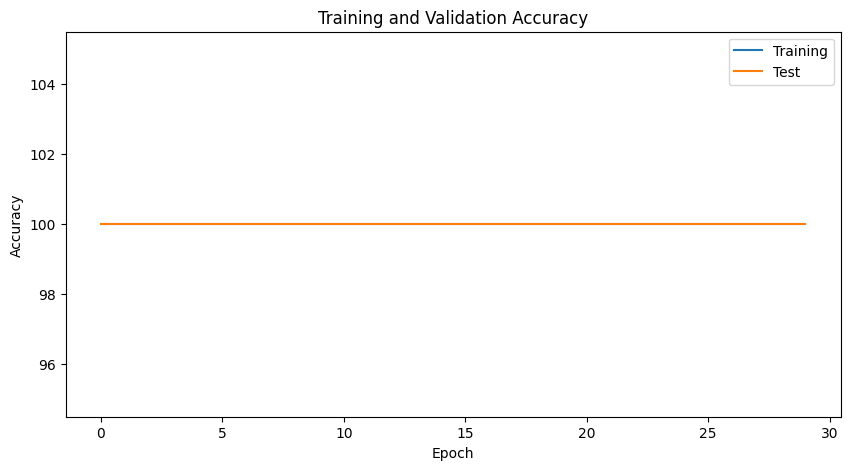

Shutting down background jobs, please wait a moment...
Done!
Waiting for the remaining 1 operations to synchronize with Neptune. Do not kill this process.
All 1 operations synced, thanks for waiting!
Explore the metadata in the Neptune app:
https://app.neptune.ai/sormazabal/HW1/e/HW-7


In [32]:
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset
from torch.utils.data.dataloader import default_collate
from sklearn import metrics
from torchmetrics import ConfusionMatrix, Precision, Recall
from torchmetrics.functional import f1_score
from torchmetrics import PrecisionRecallCurve
from sklearn.metrics import classification_report
from torchmetrics import ROC


torch.cuda.is_available()
device = "cuda" if torch.cuda.is_available() else "cpu"
df=pd.read_csv("creditcard_sample.csv")

run = neptune.init(
    name="HW-DNN",
    project="sormazabal/HW1",
    api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiI2MmYwNjgxZi1iYWI1LTQ4OTItODhiMS02YjJmZTg4MzRhN2QifQ==",
)  

Y = df['Class'] 
X = df.drop('Class', axis=1)

x_train, x_test, y_train, y_test = train_test_split(X, 
                                                    Y, 
                                                    test_size=0.2, # 20% test, 80% train
                                                    random_state=0) # make the random split reproducible

#scale
std_scaler = StandardScaler()
x_train = std_scaler.fit_transform(x_train.values)
x_test =  std_scaler.fit_transform(x_test.values)

#transform to tensor
x_train =  torch.from_numpy(x_train).float().to(device)
y_train =  torch.from_numpy(y_train.values.ravel()).float().to(device)
x_test =  torch.from_numpy(x_test).float().to(device)
y_test =  torch.from_numpy(y_test.values.ravel()).float().to(device)
n_features = x_train.shape[1]

#Hyperparameters
i = 0
n_hidden_units = n_hidden_units_arr[i]
learning_rate = learning_rate_arr[i]
mini_batch_size = mini_batch_size_arr[i]
epochs = epochs_arr[i]

params = {"n_hidden_units": n_hidden_units, "learning_rate": learning_rate, "mini_batch_size": mini_batch_size, "epochs": epochs, "optimizer": "Adam"}
run["parameters"] = params

y_loss = {}  
y_loss['train'] = []
y_loss['test'] = []

y_accuracy = {}
y_accuracy['train'] = []
y_accuracy['test'] = []

model = DNNBC(n_features =n_features).to(device)
torch.manual_seed(0)

optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)
loss_f = nn.BCELoss()



#Training
y_train = y_train.unsqueeze(1)
train_ds = TensorDataset(x_train, y_train)
train_dl = DataLoader(train_ds, batch_size=mini_batch_size, collate_fn=lambda x: tuple(x_.to(device) for x_ in default_collate(x)))


#Testing
y_test = y_test.unsqueeze(1)
test_ds = TensorDataset(x_test, y_test)
test_loader = DataLoader(test_ds, batch_size=int(mini_batch_size/2), collate_fn=lambda x: tuple(x_.to(device) for x_ in default_collate(x)))

#torch.multiprocessing.set_start_method('spawn')
import itertools
model.train()
y_pred_list = []


for epoch in range(epochs):
    
    for xb, yb in train_dl:
        y_pred = model(xb)            
        loss = loss_f(y_pred, yb) 
        acc = accuracy_f(y_pred=y_pred.to(torch.uint8), target = yb.to(torch.uint8))        

        optimizer.zero_grad()        
        loss.backward()               
        optimizer.step()              
    
    y_loss['train'].append(loss.item())
    y_accuracy['train'].append(acc)
    
    run["train/loss"].log(y_loss)
    run["train/accuracy"].log(acc)
      


    model.eval()
    with torch.inference_mode():
        for xb_test,yb_test  in test_loader:
            y_test_pred = model(xb_test)
            y_pred_class = torch.round(y_test_pred)

            loss_test = loss_f(y_test_pred, yb_test) 
            acc_test = accuracy_f(y_pred=y_test_pred.to(torch.uint8), target = yb_test.to(torch.uint8))

            run["test/loss"].log(loss_test)
            run["test/accuracy"].log(acc_test)

            if epoch == epochs-1:
                y_pred_list.append(y_pred_class.cpu().detach().numpy())


        y_loss['test'].append(loss_test.item())
        y_accuracy['test'].append(acc_test)

    if epoch % 20 == 0:
        print(f"Epoch: {epoch} | Training Accuracy: {acc:.2f}% | Training Loss: {loss:.5f} || Test Accuracy: {acc_test:.2f}% | Test Loss: {loss_test:.5f}")


           
y_pred_list = [a for a in y_pred_list]
ytest_pred = list(itertools.chain.from_iterable(y_pred_list))


target = y_test.cpu().detach().numpy()
preds = ytest_pred

show_conf_matrix(target, preds)
get_classification_report(target, preds)
plot_AUROC(target, preds)
plot_AUPRC(target, preds)
plot_loss(y_loss)
plot_accuracy(y_accuracy)

run.stop()
